<a href="https://colab.research.google.com/github/neethu-vm/Deep-learning-neural-networks/blob/main/Wine_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Basic packages
import pandas as pd 
import numpy as np
import re
import collections
import matplotlib.pyplot as plt

# Modeling, selection, and evaluation
from fastai.text import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.utils.multiclass import unique_labels

%matplotlib inline 

In [ ]:
# Use seaborn for pairplot
!pip install seaborn

# Use some functions from tensorflow_docs
!pip install git+https://github.com/tensorflow/docs

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-vle2jrn1
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-vle2jrn1
     |████████████████████████████████| 1.0MB 6.5MB/s 
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.0ef78cbc00ec3eddfc635a4c0fc2bdb3a393cd35d_-cp37-none-any.whl size=153569 sha256=c6071dc617c9300a8104db5b7ebfe1abd6334e0b1ab5aa39be36ccc3edab7c1e
  Stored in directory: /tmp/pip-ephem-wheel-cache-ipmxmnys/wheels/eb/1b/35/fce87697be00d2fc63e0b4b395b0d9c7e391a10e98d9a0d97f
Successfully built tensorflow-docs
  Found existing installation: protobuf 3.12.4
    Uninstalling protobuf-3.12.4:
      Successfully uninstalled protobuf-3.12.4


In [ ]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.5.0


In [ ]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = "/content/drive/MyDrive/Colab Notebooks/winequality.csv"

In [ ]:
data_from_colab = pd.read_csv(file_path,sep=";")

In [ ]:
data_from_colab.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
# Read file into dataframe
pd.set_option('display.max_colwidth', -1)
df = pd.read_csv(file_path,sep=";")
df = df.reindex(np.random.permutation(df.index))  
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3988,6.1,0.20,0.17,1.6,0.048,46.0,129.0,0.99100,3.30,0.43,11.4,6
2250,9.2,0.34,0.54,17.3,0.060,46.0,235.0,1.00182,3.08,0.61,8.8,6
3604,7.4,0.36,0.23,1.9,0.017,31.0,69.0,0.98920,2.93,0.36,12.5,6
54,6.8,0.20,0.59,0.9,0.147,38.0,132.0,0.99300,3.05,0.38,9.1,6
1656,5.8,0.15,0.49,1.1,0.048,21.0,98.0,0.99290,3.19,0.48,9.2,5


In [ ]:
df.quality = df.quality - 3

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3988,6.1,0.20,0.17,1.6,0.048,46.0,129.0,0.99100,3.30,0.43,11.4,3
2250,9.2,0.34,0.54,17.3,0.060,46.0,235.0,1.00182,3.08,0.61,8.8,3
3604,7.4,0.36,0.23,1.9,0.017,31.0,69.0,0.98920,2.93,0.36,12.5,3
54,6.8,0.20,0.59,0.9,0.147,38.0,132.0,0.99300,3.05,0.38,9.1,3
1656,5.8,0.15,0.49,1.1,0.048,21.0,98.0,0.99290,3.19,0.48,9.2,2


In [ ]:
train_dataset = df.sample(frac=0.8,random_state=0)
test_dataset = df.drop(train_dataset.index)

In [ ]:
train_stats = train_dataset.describe()
train_stats.pop("quality")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
fixed acidity,3918.0,6.852208,0.848529,3.80000,6.30000,6.8000,7.3000,14.20000
volatile acidity,3918.0,0.279011,0.101950,0.08000,0.21000,0.2600,0.3200,1.10000
citric acid,3918.0,0.334860,0.123347,0.00000,0.27000,0.3200,0.3900,1.66000
residual sugar,3918.0,6.386894,5.103958,0.60000,1.70000,5.2000,9.9000,65.80000
chlorides,3918.0,0.046070,0.022852,0.00900,0.03600,0.0430,0.0500,0.34600
free sulfur dioxide,3918.0,35.340607,16.831879,2.00000,23.00000,34.0000,46.0000,146.50000
total sulfur dioxide,3918.0,138.487366,42.332065,9.00000,108.00000,134.0000,167.0000,366.50000
density,3918.0,0.994045,0.003012,0.98722,0.99176,0.9938,0.9961,1.03898
pH,3918.0,3.188022,0.150487,2.77000,3.08000,3.1800,3.2800,3.82000
sulphates,3918.0,0.491776,0.115537,0.25000,0.41000,0.4800,0.5500,1.08000


In [ ]:
train_labels = train_dataset.pop('quality')
test_labels = test_dataset.pop('quality')

In [ ]:
train_labels.unique()

array([3, 2, 1, 4, 5, 0, 6])

In [ ]:
test_labels.unique()

array([3, 4, 5, 2, 1, 0])

In [ ]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [ ]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(normed_train_data.keys())]),
    layers.Dense(128, activation='relu'),
    layers.Dense(64,activation ='relu'),
    layers.Dense(7),
    layers.Softmax()
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                optimizer='adam',
                metrics=['accuracy'])
  return model

In [ ]:
normed_train_data.keys()

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [ ]:
model = build_model()

In [ ]:
EPOCHS = 100

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, accuracy:0.4764,  loss:1.7181,  val_accuracy:0.5344,  val_loss:1.6312,  
....................................................................................................

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
95,1.852956,0.608488,1.910096,0.551020,95
96,1.851919,0.609126,1.900572,0.559949,96
97,1.853657,0.608168,1.897776,0.563776,97
98,1.855715,0.604659,1.897651,0.563776,98
99,1.855973,0.605297,1.910095,0.548469,99


In [ ]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

Text(0, 0.5, 'Accuracy')

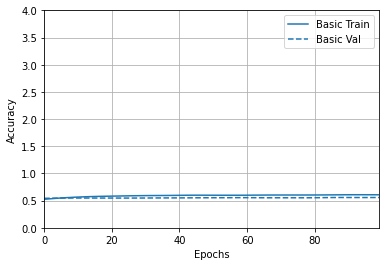

In [ ]:
plotter.plot({'Basic': history}, metric = "accuracy")
plt.ylim([0, 4])
plt.ylabel('Accuracy')

In [ ]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

early_history = model.fit(normed_train_data, train_labels, 
                    epochs=EPOCHS, validation_split = 0.2, verbose=0, 
                    callbacks=[early_stop, tfdocs.modeling.EpochDots()])


Epoch: 0, accuracy:0.4569,  loss:2.0433,  val_accuracy:0.5064,  val_loss:1.9500,  
.......................................

In [ ]:
hist = pd.DataFrame(early_history.history)
hist['epoch'] = early_history.epoch
hist.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
34,1.859814,0.602425,1.901817,0.561224,34
35,1.857168,0.605297,1.899576,0.562500,35
36,1.859447,0.602425,1.904950,0.553571,36
37,1.859886,0.602744,1.904712,0.556122,37
38,1.855208,0.606573,1.900285,0.558673,38


Text(0, 0.5, 'Accuracy [MPG]')

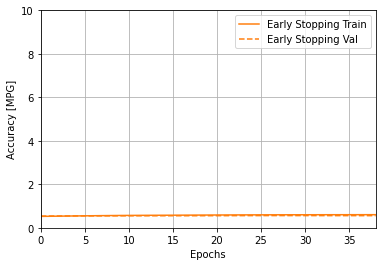

In [ ]:
plotter.plot({'Early Stopping': early_history}, metric = "accuracy")
plt.ylim([0, 10])
plt.ylabel('Accuracy [MPG]')

In [ ]:
test_predictions = model.predict(normed_test_data)
test_predictions

array([[4.025530e-18, 1.244053e-18, 2.365177e-19, 6.848341e-17, ..., 1.000000e+00, 1.251116e-17, 5.156614e-18,
        1.736206e-19],
       [9.504533e-10, 5.829941e-10, 2.834023e-10, 2.273483e-09, ..., 1.000000e+00, 1.848272e-09, 8.319082e-10,
        2.659045e-10],
       [4.823301e-17, 2.472964e-17, 5.078992e-18, 1.532427e-16, ..., 1.000000e+00, 3.195277e-16, 1.203004e-16,
        5.048029e-18],
       [2.343630e-13, 1.202171e-13, 3.802169e-14, 1.014522e-12, ..., 1.000000e+00, 5.116205e-13, 4.418587e-13,
        2.749733e-14],
       ...,
       [3.085439e-07, 2.395890e-07, 1.088947e-07, 4.951524e-07, ..., 9.999924e-01, 4.995493e-07, 4.978267e-07,
        1.303259e-07],
       [6.728149e-14, 2.184318e-14, 8.406213e-15, 5.888098e-13, ..., 1.000000e+00, 1.534597e-13, 7.838730e-14,
        6.448193e-15],
       [1.877661e-13, 1.374311e-13, 8.181143e-14, 1.193061e-13, ..., 4.237113e-11, 1.782373e-12, 6.157723e-15,
        4.975249e-14],
       [3.977183e-06, 3.269075e-06, 1.679157e-06, 

In [ ]:
output = []
for x in test_predictions:
  output.append(np.argmax(x))

In [ ]:
output

[6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 5,
 6,
 6,
 6,
 6,
 6,
 5,
 6,
 6,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 5,
 6,
 6,
 6,
 5,
 6,
 6,
 6,
 6,
 5,
 6,
 5,
 6,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 5,
 6,
 5,
 6,
 6,
 6,
 6,
 6,
 5,
 6,
 6,
 6,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 5,
 6,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 5,
 6,
 6,
 6,
 5,
 6,
 6,
 5,
 6,
 5,
 6,
 6,
 5,
 6,
 6,
 6,
 5,
 6,
 5,
 6,
 6,
 5,
 6,
 6,
 6,
 6,
 5,
 6,
 6,
 6,
 5,
 6,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 5,
 6,
 6,
 6,
 6,
 5,
 5,
 6,
 6,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 5,
 5,
 5,
 6,
 6,
 5,
 6,
 6,
 6,
 6,
 5,
 6,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 5,
 5,
 5,
 6,
 5,
 6,
 6,
 6,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 5,
 5,
 6,
 6,
 6,
 5,
 6,
 5,
 6,
 6,
 5,
 6,
 6,
 6,
 6,
 6,
 5,
 6,
 6,
 6,
 5,
 6,
 6,
 5,
 6,
 5,
 6,
 6,
 6,
 5,
 6,
 6,
 6,
 5,
 5,
 5,
 6,
 6,
 5,
 6,
 6,
 5,
 6,
 6,
 6,
 6,
 6,
 5,
 6,
 6,
 5,
 6,
 6,
 5,
 6,
 5,
 5,


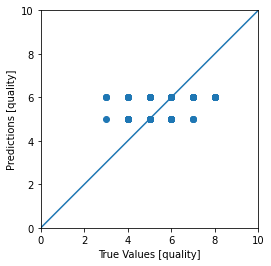

In [ ]:
test_predictions = model.predict(normed_test_data)

a = plt.axes(aspect='equal')
plt.scatter(test_labels, output)
plt.xlabel('True Values [quality]')
plt.ylabel('Predictions [quality]')
lims = [0, 10]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)
